## Logistic Regression 에서 MLE에 대한 GD 구현

### Chain Rule 정리  

$ h = W_{1}X_{1} + W_{2}X_{2} + b  $  
$ p = \frac{1}{1 + exp(-h)}  $  
$ L^* =  \sum_{i}^{N}{t_{i} log(p) + (1-t_{i})log(1-p) } $  
$ J^* = - \sum_{i}^{N}{t_{i} log(p) + (1-t_{i})log(1-p) } $  

$ \frac{\partial{J^*}}{\partial{p}} = - \frac{1}{N} \sum_{i}^{N}{( \frac{t_i}{p_i} - \frac{1-t_i}{1-p_i} )} $  
$ \frac{\partial{p_i}}{\partial{h}} = p_i(1-p_i)$  
$ \frac{\partial{h}}{\partial{W_i}} = X_i $  
$ \frac{\partial{h}}{\partial{b}} = 1 $  
$ \frac{\partial{J^*}}{\partial{W}} = \sum_{i}^{N}{X^T  (P - T)}$  
$ \frac{\partial{J^*}}{\partial{W_i}} = \frac{1}{N}  X_i^T  (P_i - T_i) $

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [68]:
class Logistic:
    def __init__(self):
        
        self.params = {}
        self.params['W'] = 0.01 * np.random.randn(2, 1)
        self.params['b'] = np.ones(1)
    def forward(self, X):
        #Sigmoid 함수
        W = self.params['W']
        b = self.params['b']
        h = np.dot(X, W) + b
        p = 1 / (1 + np.exp(-h))
        
        return p
    
    def loss(self, X, T):
        
        p = self.forward(X)
        
        #Log_Likelihood
        L = np.dot(T.reshape(1,200), np.log(p)) + np.dot(1 - T.reshape(1,200), np.log(1 - p))
        L = np.squeeze(L)
        #for i in range(len(X)):
        #for문으로 각 데이터의 Log_Likelihood를 더해준다.
        #    L += ( T[i] * np.log(p[i]) + (1 - T[i]) * np.log(1 - p[i]) )
        
        #목적함수는 -Log_Likelihood
        return -L
    
    def gradient(self, X, T, learning_rate = 0.0001):
        
        p = self.forward(X)
        #T = np.array(T)
        T = T.reshape(-1,1)
        #목적함수에 대한 가중치 미분값을 담을 zero array 생성
        grads = {}
        grads['W'] = np.zeros((2, 1))
        grads['b'] = np.zeros(1)
        
        #목적함수에 대한 가중치 미분값 합 구하기
        grads['W'] = (1/len(T)) * -np.dot(X.T, T-p)
        grads['b'] = (1/len(T)) * -np.sum((T - T*p) - (p - T*p))
#         for i in range(len(X)):
#             #for문으로 가중치에 대한 목적함수 미분 값 모두 더하기
#             grads['W'] -= ((T[i] * (1-p[i])) - ((1-T[i]) * p[i])) * X[i].reshape(2,1)
#             #print(i, ":  ", grads['W'])
#             grads['b'] -= ((T[i] * (1-p[i])) - ((1-T[i]) * p[i])) * 1
            
#             if i == len(X) - 1:
#                 grads['W'] /= len(X)
#                 grads['b'] /= len(X)
        self.params['W'] -= learning_rate * grads['W']
        self.params['b'] -= learning_rate * grads['b']

In [69]:
data = pd.read_csv("assignment_2.csv")
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


In [70]:
data.shape

(200, 4)

In [71]:
# filter out the applicants that got admitted
MALE = data[data['Label']==1]
FEMALE = data[data['Label'] == 0]

C:\Users\HoonCheol\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,0,'Experience')

Text(0,0.5,'Salary')

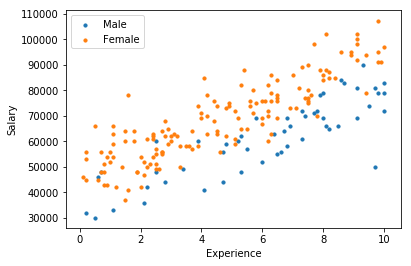

In [72]:
# plots
fig = plt.figure()
plt.scatter(MALE.iloc[:, 2], MALE.iloc[:, 3], s=10, label='Male')
plt.scatter(FEMALE.iloc[:, 2], FEMALE.iloc[:, 3], s=10, label='Female')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.legend()
plt.show()

In [73]:
#데이터 간단 전처리
del data["bias"]
#salary 변수는 스케일링 해준다.
data["salary"] = 0.0001 * data["salary"]
# data["salary"] = (data["salary"] - data["salary"].mean()) / data["salary"].std()
# data["experience"] = (data["experience"] - data["experience"].mean()) / data["experience"].std()
#input으로 넣기 쉽게끔 array화
X = data[["experience", "salary"]].values
T = data["Label"].values

In [74]:
l = Logistic()

In [75]:
#l.forward(X)

In [76]:
l.loss(X, T)

211.36536687754275

In [77]:
for i in range(100000):
    if i % 10000 == 0:
        print(i, "번째 Loss : ", l.loss(X, T))
    l.gradient(X, T)

0 번째 Loss :  211.36536687754275
10000 번째 Loss :  97.3547221129829
20000 번째 Loss :  86.68818713463762
30000 번째 Loss :  81.9755226136966
40000 번째 Loss :  79.54173899247397
50000 번째 Loss :  78.13675230581319
60000 번째 Loss :  77.25287431065581
70000 번째 Loss :  76.65513035837105
80000 번째 Loss :  76.22398825726779
90000 번째 Loss :  75.89424665618883


In [78]:
l.params

{'W': array([[ 0.74392527],
        [-0.94448405]]), 'b': array([1.05205428])}

In [79]:
# filter out the applicants that got admitted
MALE = data[data['Label']==1]
FEMALE = data[data['Label'] == 0]

C:\Users\HoonCheol\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,0,'Experience')

Text(0,0.5,'Salary')

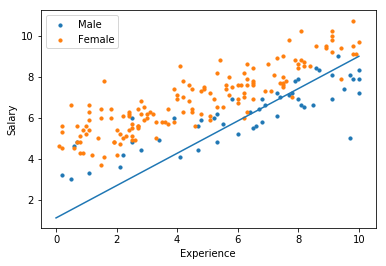

In [81]:
# plots
fig = plt.figure()
plt.scatter(MALE.iloc[:, 1], MALE.iloc[:, 2], s=10, label='Male')
plt.scatter(FEMALE.iloc[:, 1], FEMALE.iloc[:, 2], s=10, label='Female')

x_axis = np.linspace(0, 10,50)
y_axis = -(l.params['b'][0] + x_axis*l.params['W'][0]) / l.params['W'][1]

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.plot(x_axis, y_axis)
plt.legend()
plt.show()